In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import pretty_print

---

# TASK 1

---

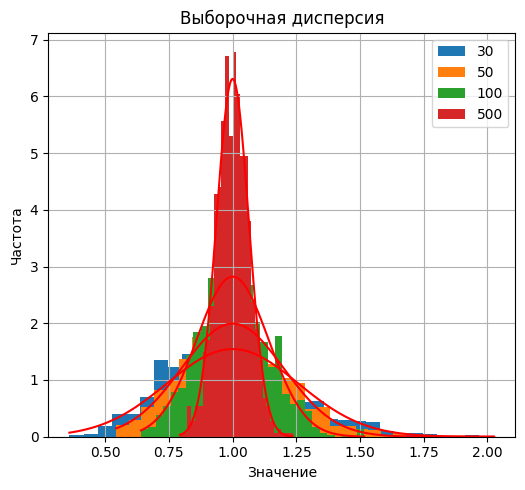

In [48]:
mu = 0
sigma = 1
samples_size = [30, 50, 100, 500]
count_of_experiments = 1000

samples_var = []

plt.figure(figsize=(15, 5))

for  i, samples_size in enumerate(samples_size):
    samples_var =  numpy.zeros(count_of_experiments)    
    for j in range (count_of_experiments):
        samples = numpy.random.normal(mu, sigma, samples_size)
        samples_var[j]=(numpy.var(samples, ddof=1))
    
    plt.subplot(1, 3, 1)
    plt.hist(samples_var, bins=30, density=True, label=str(samples_size))
    plt.title('Выборочная дисперсия')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    x = numpy.linspace(min(samples_var), max(samples_var), 100)
    y = scipy.stats.norm.pdf(x, loc= sigma**2, scale=numpy.sqrt((2*sigma**4)/samples_size))
    
    plt.plot(x, y, color='red')



plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

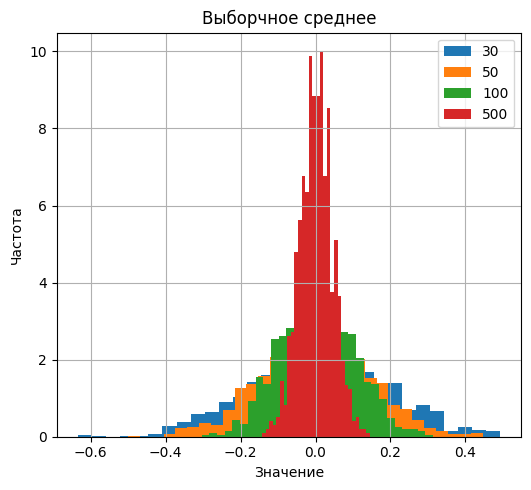

In [51]:
mu = 0
sigma = 1
samples_size = [30, 50, 100, 500]
count_of_experiments = 1000

samples_means = []

plt.figure(figsize=(15, 5))

for  i, samples_size in enumerate(samples_size):
    samples_means =  numpy.zeros(count_of_experiments)    
    for j in range (count_of_experiments):
        samples = numpy.random.normal(mu, sigma, samples_size)
        samples_means[j]=(numpy.mean(samples))
    
    plt.subplot(1, 3, 1)
    plt.hist(samples_means, bins=30, density=True, label=str(samples_size))
    plt.title('Выборчное среднее')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    x = numpy.linspace(min(samples_means), max(samples_means), 100)
    y = scipy.stats.norm.pdf(x, loc= sigma**2, scale=numpy.sqrt((2*sigma**4)/samples_size))
    



plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

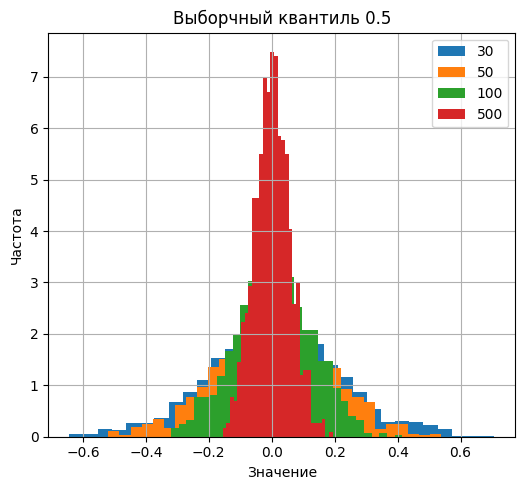

In [50]:
mu = 0
sigma = 1
samples_size = [30, 50, 100, 500]
count_of_experiments = 1000

samples_quantiles = []

plt.figure(figsize=(15, 5))

for  i, samples_size in enumerate(samples_size):
    samples_quantiles =  numpy.zeros(count_of_experiments)    
    for j in range (count_of_experiments):
        samples = numpy.random.normal(mu, sigma, samples_size)
        samples_quantiles[j]=(numpy.percentile(samples, 50))
    
    plt.subplot(1, 3, 1)
    plt.hist(samples_quantiles, bins=30, density=True, label=str(samples_size))
    plt.title('Выборчный квантиль 0.5')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    x = numpy.linspace(min(samples_quantiles), max(samples_quantiles), 100)
    y = scipy.stats.norm.pdf(x, loc= sigma**2, scale=numpy.sqrt((2*sigma**4)/samples_size))
    



plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 𝑛𝐹(𝑋(2)) → 𝑈1 ∼ Γ(2, 1) - experiment:

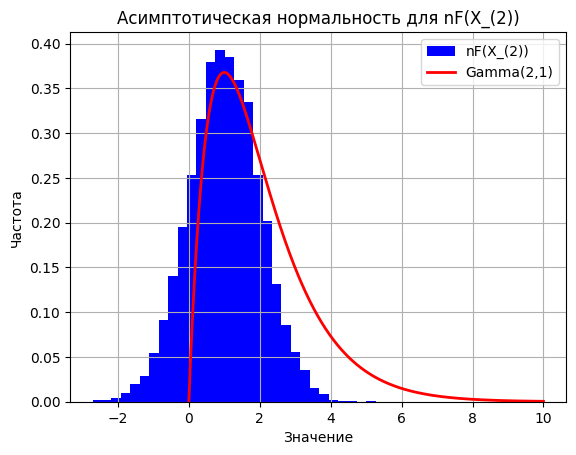

In [53]:
shape = 2
scale = 1

samples_size = 100

count_of_samples = 10000
samples_statistics = numpy.zeros(count_of_samples)

for i in range(count_of_samples):
    sample = numpy.random.normal(0.01, 0.01, samples_size)
    numpy.sort(sample)
    samples_statistics[i] = samples_size * sample[1]

plt.hist(samples_statistics, bins=30, density=True, color='blue', label='nF(X_(2))')

x = numpy.linspace(0, 10, 1000)

plt.plot(x, scipy.stats.gamma.pdf(x, shape, scale=1), 'r-', lw=2, label='Gamma(2,1)')

plt.title('Асимптотическая нормальность для nF(X_(2))')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

## 𝑛(1 − 𝐹(𝑋(𝑛))) → 𝑈2 ∼ Γ(1, 1) = Exp(1) - experiment:

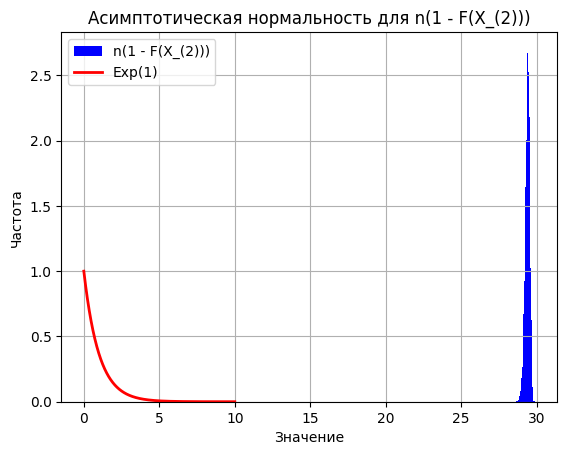

In [54]:
shape = 2
scale = 1

samples_size = 30

count_of_samples = 10000
samples_statistics = numpy.zeros(count_of_samples)

for i in range(count_of_samples):
    sample = numpy.random.normal(0, 0.01, samples_size)
    sample = numpy.sort(sample)
    samples_statistics[i] = samples_size * (1 - sample[len(sample)-1])
    
plt.hist(samples_statistics, bins=30, density=True, color='blue', label='n(1 - F(X_(2)))')

x = numpy.linspace(0, 10, 1000)

plt.plot(x, scipy.stats.gamma.pdf(x, 1, scale=1), 'r-', lw=2, label='Exp(1)')

plt.title('Асимптотическая нормальность для n(1 - F(X_(2)))')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

---

# TASK 2

---

In [2]:
iris = pd.read_csv('iris.csv')

sepal_length = 'Sepal.Length'
sepal_width = 'Sepal.Width'
petal_length = 'Petal.Length'
petal_width = 'Petal.Width'

iris['sepal_square'] = iris[sepal_length] * iris[sepal_width]
iris['petal_square'] = iris[petal_length] * iris[petal_width]
iris['total_square'] = iris['sepal_square'] + iris['petal_square']

setosa = iris[iris['Species'] == 'setosa']
versicolor = iris[iris['Species'] == 'versicolor']
virginica = iris[iris['Species'] == 'virginica']

In [3]:
def sample_average(square):
    return sum(square)/square.count()


def sample_variance(square, avg):
    avg_square = avg * avg
    return sum(square ** 2) / square.count() - avg_square


def sample_median(square):
    sorted_square = square.sort_values()
    count = len(sorted_square)
    if count % 2 == 0:
        return (sorted_square.iloc[count//2 - 1] + sorted_square.iloc[count//2])/2
    else:
        return sorted_square.iloc[count//2 - 1]

In [4]:
def calculations():
    data_map = {}
    species = {"Total": [iris['total_square']], "Setosa": [setosa['total_square']],
               "Versicolor": [versicolor['total_square']], "Virginica": [virginica['total_square']]}
    
    for spec in species:
        square = species[spec][0]
        average = sample_average(square)
        variance = sample_variance(square, average)
        median = sample_median(square)
        quantile = str(numpy.quantile(square, 0.4))
        data_map[spec] = [str(average), str(variance), str(median), str(quantile)]
        
    return data_map

In [58]:
def tables_output():
    values = calculations()
    species_count = {"Setosa": len(setosa), "Versicolor": len(versicolor), "Virginica": len(virginica)}
    data = [["SPECIES", "AVERAGE", "VARIANCE", "MEDIAN", "QUANTILE (0.4)"]]
    min_max_data = [["SPECIES", "COUNT"]]
    
    for spec in values:
        data.append([spec] + values[spec])
        
    for spec in species_count:
        count = [str(species_count[spec])]
        min_max_data.append([spec] + count)
    
    pretty_print.print_pretty_table(min_max_data)
    print()
    pretty_print.print_pretty_table(data)

In [59]:
tables_output()

   SPECIES | COUNT
-----------+------
    Setosa |    50
Versicolor |    50
 Virginica |    50

   SPECIES |            AVERAGE |           VARIANCE | MEDIAN |     QUANTILE (0.4)
-----------+--------------------+--------------------+--------+-------------------
     Total | 23.616933333333332 |  47.59009726222223 |   22.5 | 20.316000000000003
    Setosa | 17.623400000000004 |  8.761258439999835 |  17.66 | 16.735999999999997
Versicolor | 22.246600000000004 | 15.517426439999724 |  22.21 |             21.142
 Virginica |            30.9808 | 26.464819359999865 | 31.475 |             29.716


## ECDF

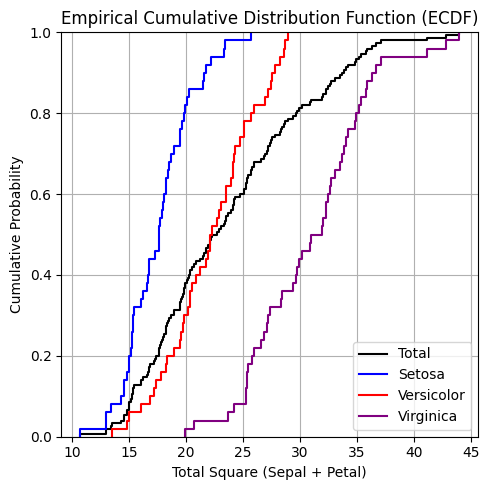

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.ecdfplot(iris['total_square'], label='Total', color='black')
sns.ecdfplot(setosa['total_square'], label='Setosa', color='blue')
sns.ecdfplot(versicolor['total_square'], label='Versicolor', color='red')
sns.ecdfplot(virginica['total_square'], label='Virginica', color='purple')
axs.set_title('Empirical Cumulative Distribution Function (ECDF)')
axs.set_xlabel('Total Square (Sepal + Petal)')
axs.set_ylabel('Cumulative Probability')
axs.legend()
axs.grid()

plt.tight_layout()
plt.show()

## Histogram

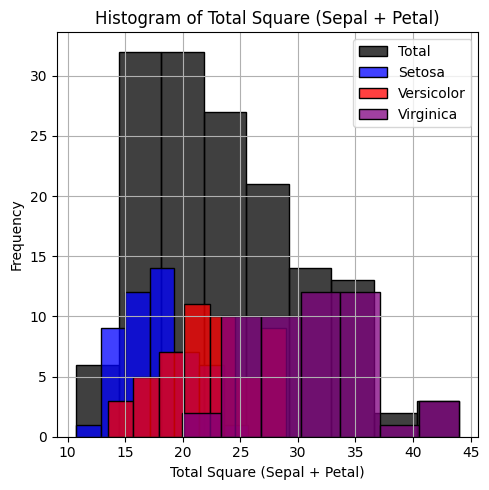

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.histplot(iris['total_square'], kde=False, color='black', label='Total')
sns.histplot(setosa['total_square'], kde=False, label='Setosa', color='blue')
sns.histplot(versicolor['total_square'], kde=False, label='Versicolor', color='red')
sns.histplot(virginica['total_square'], kde=False, label='Virginica', color='purple')
axs.set_title('Histogram of Total Square (Sepal + Petal)')
axs.set_xlabel('Total Square (Sepal + Petal)')
axs.set_ylabel('Frequency')
axs.legend()
axs.grid()

plt.tight_layout()
plt.show()

## Boxplot

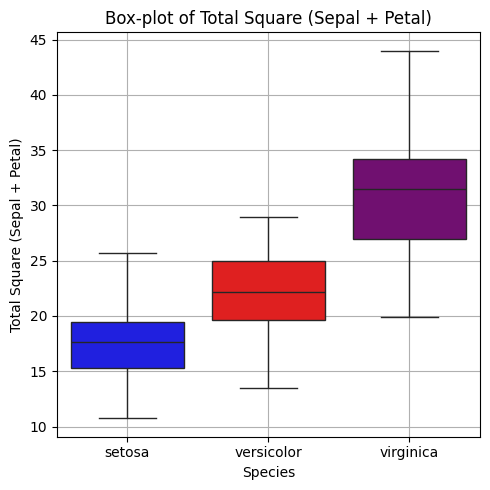

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.boxplot(x='Species', y='total_square', data=iris, hue='Species', palette=['blue', 'red', 'purple'], legend=False)
axs.set_title('Box-plot of Total Square (Sepal + Petal)')
axs.set_xlabel('Species')
axs.set_ylabel('Total Square (Sepal + Petal)')
axs.grid()

plt.tight_layout()
plt.show()

---